## Inspecting the tf run output for the custom kanto classifier


### Inspect the files contents

In [5]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import os

# Path to your .tfevents file
tfevents_paths = [
    "../final-runs/events.out.tfevents.resnet-pretrained",
]

# Read the file and print available tags and data
print("Reading tfevents files...\n")
for tfevents_path in tfevents_paths:
    print(f"Processing file: {os.path.basename(tfevents_path)}")
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            print(f"Step: {event.step}, Tag: {value.tag}, Value: {value.simple_value}")


Reading tfevents files...

Processing file: events.out.tfevents.resnet-pretrained
Step: 55, Tag: Batch Loss, Value: 5.140188694000244
Step: 65, Tag: Batch Loss, Value: 4.758257865905762
Step: 75, Tag: Batch Loss, Value: 4.211314678192139
Step: 85, Tag: Batch Loss, Value: 3.7434046268463135
Step: 95, Tag: Batch Loss, Value: 2.8615927696228027
Step: 105, Tag: Batch Loss, Value: 2.804861307144165
Step: 1, Tag: Epoch Training Loss, Value: 3.800374984741211
Step: 1, Tag: Epoch Training Accuracy, Value: 41.811859130859375
Step: 1, Tag: Training Precision, Value: 48.970699310302734
Step: 1, Tag: Training Recall, Value: 39.52676773071289
Step: 1, Tag: Training F1 Score, Value: 42.05903625488281
Step: 1, Tag: Training Learning Rate, Value: 0.0005000000237487257
Step: 2, Tag: Epoch Validation Accuracy, Value: 87.99589538574219
Step: 2, Tag: Epoch Validation Loss, Value: 1.5557785034179688
Step: 2, Tag: Epoch Validation Precision, Value: 88.89153289794922
Step: 2, Tag: Epoch Validation Recall, Va

In [6]:
# Check each unique tag in the file

tags = set()
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            tags.add(value.tag)

print("\nUnique tags in the file:")
for tag in tags:
    print(tag)


Unique tags in the file:
Class Accuracy/Cloyster
Worst Performing Classes/text_summary
Class Accuracy/Dratini
Class Accuracy/Kakuna
Class Accuracy/Clefable
Class Accuracy/Bulbasaur
Class Accuracy/Haunter
Class Accuracy/Oddish
Class Accuracy/Onix
Class Accuracy/Hitmonlee
Class Accuracy/Mewtwo
Class Accuracy/Lickitung
Class Accuracy/Alakazam
Class Accuracy/Dewgong
Class Accuracy/Nidorina
Class Accuracy/Paras
Class Accuracy/Cubone
Class Accuracy/Kabuto
Training F1 Score
Class Accuracy/Seaking
Class Accuracy/Ponyta
Class Accuracy/MrMime
Class Accuracy/Pidgey
Class Accuracy/Tangela
Class Accuracy/Koffing
Per-Class Accuracy
Class Accuracy/Zapdos
Class Accuracy/Rhyhorn
Class Accuracy/Jolteon
Class Accuracy/Moltres
Class Accuracy/Abra
Class Accuracy/Magnemite
Training Precision
Class Accuracy/Machop
Class Accuracy/Exeggcute
Class Accuracy/Horsea
Class Accuracy/Primeape
Class Accuracy/Magikarp
Epoch Validation Loss
Class Accuracy/Caterpie
Class Accuracy/Magmar
Class Accuracy/Rattata
Class Accu

Epoch 1: Training Loss = 3.800374984741211
Epoch 1: Training Accuracy = 41.811859130859375
Epoch 2: Validation Accuracy = 87.99589538574219
Epoch 2: Validation Loss = 1.5557785034179688
Epoch 2: Training Loss = 2.6979243755340576
Epoch 2: Training Accuracy = 80.53644561767578
Epoch 3: Validation Accuracy = 95.2276382446289
Epoch 3: Validation Loss = 1.2426048517227173
Epoch 3: Training Loss = 2.5339772701263428
Epoch 3: Training Accuracy = 82.551025390625
Epoch 4: Validation Accuracy = 95.90103912353516
Epoch 4: Validation Loss = 1.1971187591552734
Epoch 4: Training Loss = 2.435370683670044
Epoch 4: Training Accuracy = 85.58168029785156
Epoch 5: Validation Accuracy = 96.47196197509766
Epoch 5: Validation Loss = 1.1052329540252686
Epoch 5: Training Loss = 2.4281699657440186
Epoch 5: Training Accuracy = 83.85698699951172
Epoch 6: Validation Accuracy = 96.92577362060547
Epoch 6: Validation Loss = 1.157232403755188
Epoch 6: Training Loss = 2.4272098541259766
Epoch 6: Training Accuracy = 85

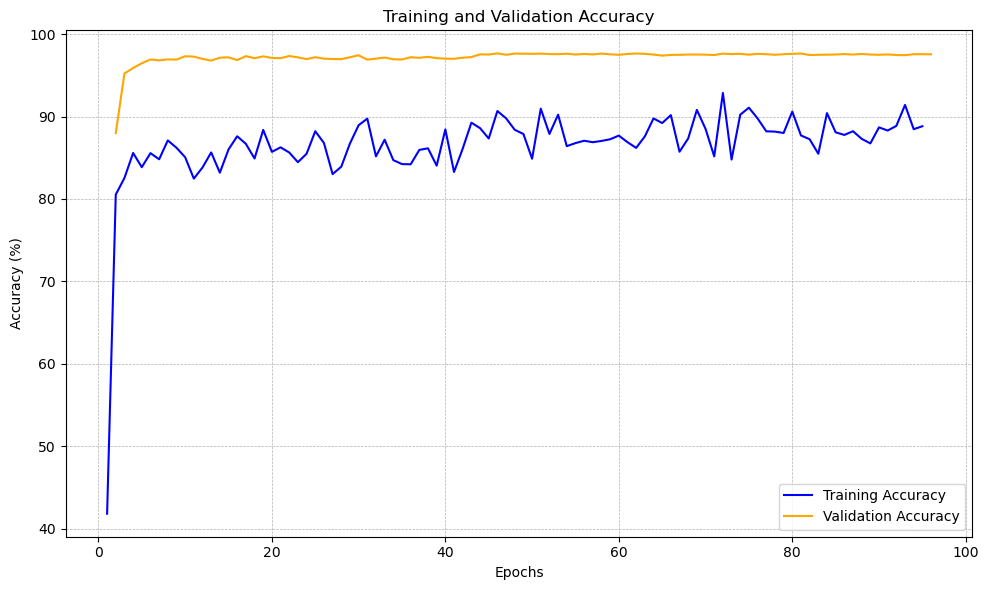

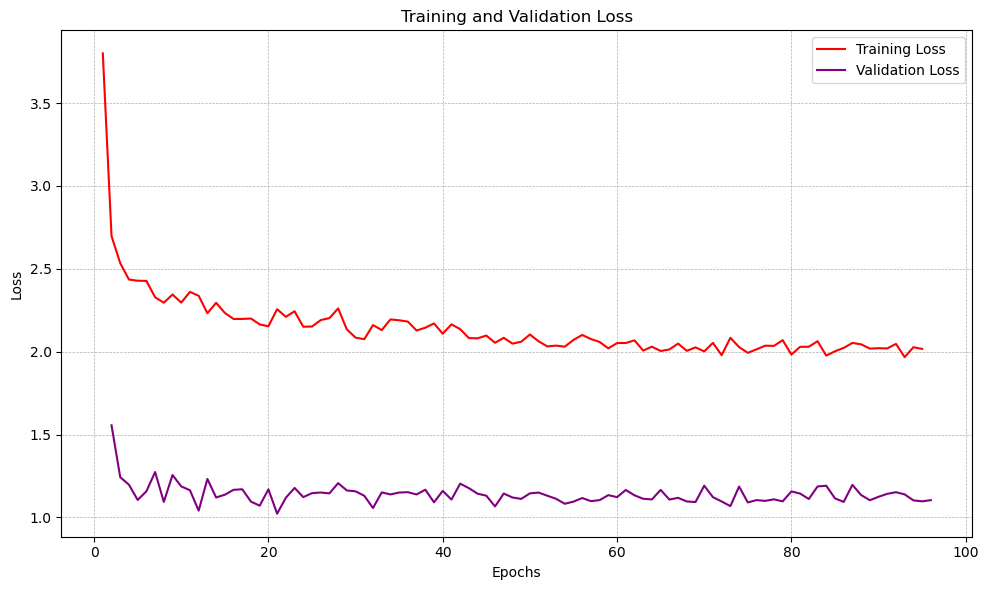

In [7]:
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt


# Initialize empty lists for metrics
epoch_steps_train = []
epoch_train_accuracy = []
epoch_train_loss = []
epoch_steps_val = []
epoch_val_accuracy = []
epoch_val_loss = []

# Initalize empty lists for batch metrics
batch_steps_train = []
batch_loss = []

# Parse the tfevents file
for tfevents_path in tfevents_paths:
    for summary in summary_iterator(tfevents_path):
        for value in summary.summary.value:
            if value.tag == "Epoch Training Accuracy":  # Training accuracy
                epoch_steps_train.append(summary.step)
                print(f"Epoch {summary.step}: Training Accuracy = {value.simple_value}")
                epoch_train_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Validation Accuracy":  # Validation accuracy
                print(f"Epoch {summary.step}: Validation Accuracy = {value.simple_value}")
                epoch_steps_val.append(summary.step)
                epoch_val_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Training Loss":  # Training loss
                print(f"Epoch {summary.step}: Training Loss = {value.simple_value}")
                epoch_train_loss.append(value.simple_value)
            elif value.tag == "Epoch Validation Loss": # Validation loss
                print(f"Epoch {summary.step}: Validation Loss = {value.simple_value}")
                epoch_val_loss.append(value.simple_value)
            elif value.tag == "Batch Loss":  # Batch loss
                batch_steps_train.append(summary.step)
                batch_loss.append(value.simple_value)

#print final values
print("\n")
print("Final epoch: ", epoch_steps_train[-1])
print("Final Training Accuracy: ", epoch_train_accuracy[-1])
print("Final Validation Accuracy: ", epoch_val_accuracy[-1])
print("Final Training Loss: ", epoch_train_loss[-1])
print("Final Validation Loss: ", epoch_val_loss[-1])
print("Final Batch Loss: ", batch_loss[-1])

# Plot 1: Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_accuracy, label="Training Accuracy", color="blue")
plt.plot(epoch_steps_val, epoch_val_accuracy, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_loss, label="Training Loss", color="red")
plt.plot(epoch_steps_val, epoch_val_loss, label="Validation Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


# # Plot 3: Batch Loss
# plt.figure(figsize=(10, 6))
# plt.plot(batch_steps_train, batch_loss, label="Batch Loss", color="green", linestyle="-.")
# plt.xlabel("Steps")
# plt.ylabel("Loss")
# plt.title("Batch Loss")
# plt.legend()
# plt.grid(visible=True, linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.show()



Reading tfevents file...

Top 10 Best Class Accuracies:
1. Abra: 100.00%
2. Articuno: 100.00%
3. Beedrill: 100.00%
4. Bellsprout: 100.00%
5. Blastoise: 100.00%
6. Butterfree: 100.00%
7. Clefairy: 100.00%
8. Cubone: 100.00%
9. Diglett: 100.00%
10. Ditto: 100.00%


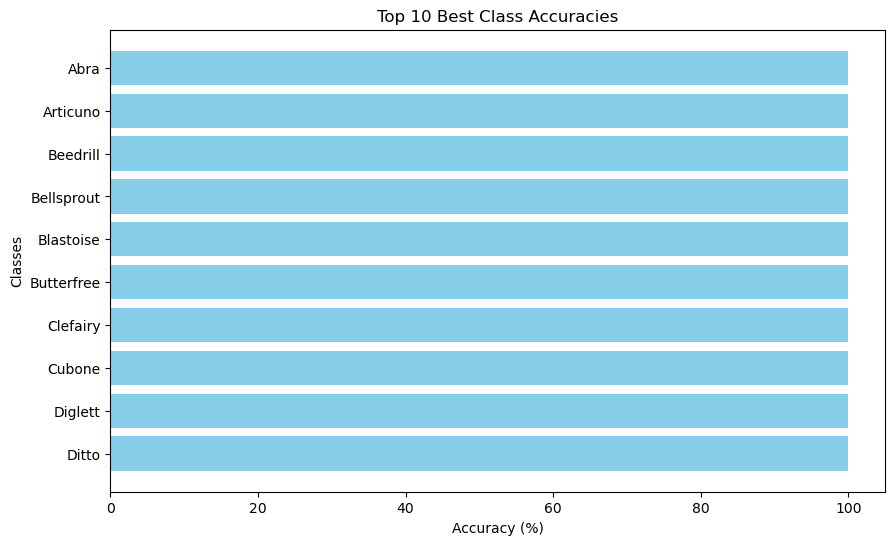

Top 10 Worst Class Accuracies:
1. Nidoran-m: 76.47%
2. Muk: 80.00%
3. Poliwrath: 81.63%
4. Poliwhirl: 81.67%
5. Pidgeotto: 86.36%
6. Mew: 89.74%
7. Venusaur: 89.74%
8. Growlithe: 92.45%
9. Grimer: 92.50%
10. Kingler: 92.68%


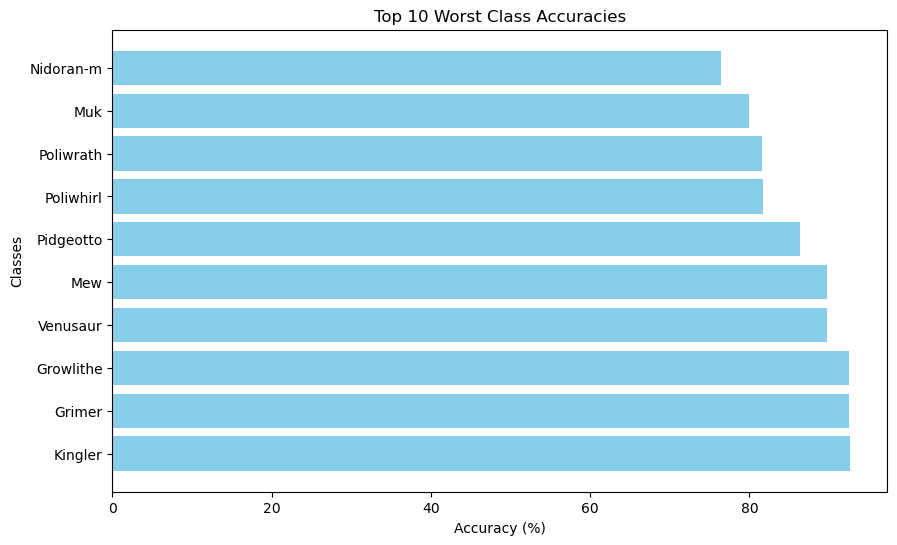

In [8]:
# Get top 10 best class accuracy

from tensorflow.python.summary.summary_iterator import summary_iterator
import re
import matplotlib.pyplot as plt

# Regex pattern to match "Class Accuracy/*"
pattern = r"Class Accuracy/([\w\s-]+)"

# Dictionary to store class accuracies
class_accuracies = {}

# Read the tfevents file
print("Reading tfevents file...\n")
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            # Check if the tag matches "Class Accuracy/*"
            match = re.match(pattern, value.tag)
            if match:
                class_name = match.group(1)  # Extract class name
                class_accuracies[class_name] = value.simple_value  # Store the accuracy

# Sort the classes by accuracy in descending order and select the top 10
top_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*top_10)

# Print the top 10 class accuracies
print("Top 10 Best Class Accuracies:")
for i, (class_name, accuracy) in enumerate(top_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Best Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# now lets get the worst 10 class accuracy
worst_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=False)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*worst_10)

# Print the top 10 class accuracies
print("Top 10 Worst Class Accuracies:")
for i, (class_name, accuracy) in enumerate(worst_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Worst Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



